***Adrián Yared Armas de la Nuez***

   Input variables:
   # bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  
  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Importación de los datos
#repositorio = 'https://raw.githubusercontent.com/SalvadorBR/SNS_2324_ACT_4_1/main/bank%2Bmarketing/bank/bank-full.csv'
repositorio = 'https://raw.githubusercontent.com/SalvadorBR/SNS_2324_ACT_4_1/main/bank%2Bmarketing/bank/bank.csv'


df_clients_ori = pd.read_csv(repositorio, sep=';')
columns =df_clients_ori.columns.values

In [ ]:
df_clients_ori

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
columns

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [ ]:
for columna in df_clients_ori.columns:
    num_valores_unicos = df_clients_ori[columna].nunique()
    print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna age: 67
Número de valores únicos en la columna job: 12
Número de valores únicos en la columna marital: 3
Número de valores únicos en la columna education: 4
Número de valores únicos en la columna default: 2
Número de valores únicos en la columna balance: 2353
Número de valores únicos en la columna housing: 2
Número de valores únicos en la columna loan: 2
Número de valores únicos en la columna contact: 3
Número de valores únicos en la columna day: 31
Número de valores únicos en la columna month: 12
Número de valores únicos en la columna duration: 875
Número de valores únicos en la columna campaign: 32
Número de valores únicos en la columna pdays: 292
Número de valores únicos en la columna previous: 24
Número de valores únicos en la columna poutcome: 4
Número de valores únicos en la columna y: 2


In [ ]:
# Elimino las columnas que considero no son interesantes para realizar el clustering
# ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day', 'month', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'y']
# No voy a continuar con las siguientes columnas: 'day', 'month', 'default', 'previous', 'pdays'
columns_selected = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',  'duration','campaign', 'poutcome', 'y']

df_clients = df_clients_ori[columns_selected]
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,79,1,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,220,1,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,185,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,199,4,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,226,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,329,5,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,153,1,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,151,11,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,129,4,other,no


In [ ]:
# Conversión de variables catgóricas a numéricas
le = LabelEncoder()
pd.options.mode.copy_on_write = True # Para que no muestre el warning

df_clients['job'] = le.fit_transform(df_clients['job'])
df_clients['marital'] = le.fit_transform(df_clients['marital'])
df_clients['education'] = le.fit_transform(df_clients['education'])
#df_clients['default'] = le.fit_transform(df_clients['default'])
df_clients['housing'] = le.fit_transform(df_clients['housing'])
df_clients['loan'] = le.fit_transform(df_clients['loan'])
df_clients['contact'] = le.fit_transform(df_clients['contact'])
df_clients['poutcome'] = le.fit_transform(df_clients['poutcome'])
df_clients['y'] = le.fit_transform(df_clients['y'])


In [ ]:
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,10,1,0,1787,0,0,0,79,1,3,0
1,33,7,1,1,4789,1,1,0,220,1,0,0
2,35,4,2,2,1350,1,0,0,185,1,0,0
3,30,4,1,2,1476,1,1,2,199,4,3,0
4,59,1,1,1,0,1,0,2,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-333,1,0,0,329,5,3,0
4517,57,6,1,2,-3313,1,1,2,153,1,3,0
4518,57,9,1,1,295,0,0,0,151,11,3,0
4519,28,1,1,1,1137,0,0,0,129,4,1,0


## Transformación de los datos



In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
clients_scaled = min_max_scaler.fit_transform(df_clients)
clients_scaled

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55882353, 0.81818182, 0.5       , ..., 0.20408163, 1.        ,
        0.        ],
       [0.13235294, 0.09090909, 0.5       , ..., 0.06122449, 0.33333333,
        0.        ],
       [0.36764706, 0.18181818, 1.        , ..., 0.02040816, 0.33333333,
        0.        ]])

Tenemos que ser conscientes de que *clients_scaled* es ahora una matriz de numpy, que no es la misma *estructura de datos* que *df_clients* (que es un dataframe).

Antes de realizar el clustering sería recomendable seleccionar aquellas variables que nos parezcan más significativas para el problema.  Esto es recomendable incluso antes de realizar el procesamiento de los datos, pero esto sólo es posible si conocemos bien el problema de antemano.

Si no conocemos el problema, podemos estudiar cómo se distribuyen esos datos una vez han sido cargados, como por ejemplo, ver la correlación entre variables y/o realizar un **análisis de componentes principales (PCA)** , con el objetyivo de detectar si hay algún patrón que nos pueda ayudar a tomar una determinada estrategia, a continuación obtener una proyección 2D de los datos que podamos visualizar y poder así tomar una decisión al respecto.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(clients_scaled)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df_clients.columns)

[0.26445274 0.18531217]


,PC-1,PC-2
age,-0.040490,0.055506
job,-0.114728,0.022419
marital,-0.050828,-0.061621
education,-0.081631,-0.036904
balance,-0.003900,0.001125
housing,0.806814,-0.537082
loan,0.029657,-0.002243
contact,0.547678,0.715328
duration,-0.004461,-0.008826
campaign,0.001596,0.007281


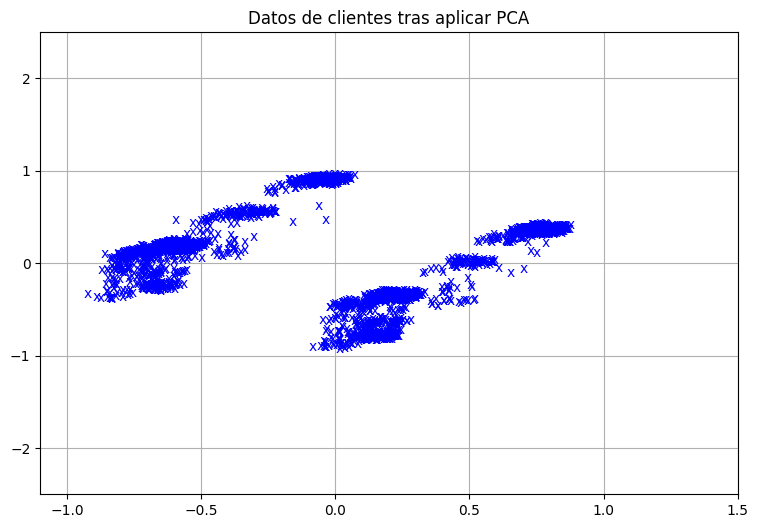

In [ ]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.1, 1.5)
plt.ylim(-2.5, 2.5)
plt.title("Datos de clientes tras aplicar PCA")
plt.grid()
plt.show()

## Ejecución del algoritmo de clustering jerárquico

A continuación, vamos a ejecutar un algoritmo de clustering jerárquico (notar que tardará un rato en ejecutarse) para ver cómo se distribuyen los datos.

Dado que la mayor parte de los datos no están muy concentrados y el resto parecen valores atípicos, es mejor utilizar como distancia intercluster el **vecino más próximo** (single). Las opciones más recomendadas para este problema van desde el **vecino más alejado** (complete) hasta la **mínima varianza** (ward).

Utilizaremos como distancia el vecino más cercano (single) ya que nos permitirá dividir los grupos más grandes. Se establece un umbral (threshold) de $15$ como distancia a partir de la cual se considerará que los grupos a distancia mayor son grupos independientes (y por lo tanto no se agruparan).


Distancia Media	   1.41


<ipython-input-16-711d73874d91>:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='single')  # Puedes cambiar a 'ward' o 'complete'


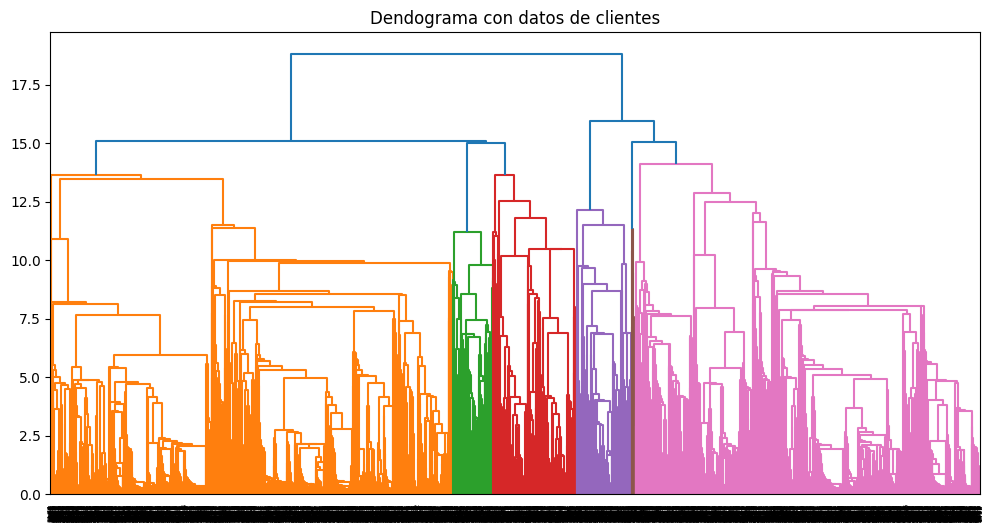

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from scipy import cluster

# 1. Calcular la matriz de distancias
D = pairwise_distances(clients_scaled, metric='euclidean')
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Construir dendrograma
plt.figure(figsize=(12, 6))
clusters = cluster.hierarchy.linkage(D, method='single')  # Puedes cambiar a 'ward' o 'complete'
cluster.hierarchy.dendrogram(clusters, color_threshold=15)
plt.title("Dendograma con datos de clientes")
plt.show()


Tras realizar el corte a una distancia de $15$ utilizando distancia intercluster el vecino más alejado (complete), obtenemos $7$ grupos. Este nivel de corte debe realizarse ad-hoc en un nível que consideremos lógico. En este caso concreto, vemos que realizar este corte nos da unos cuantos outiliers (grupos de un solo elemento).

A continuación vamos a obtener un vector (*labels*) que, dada una distancia de corte (*threshold*) y un criterio de distancia intercluster, contenga el grupo al que pertece cada elemento.

In [ ]:
# 3. Obtenemos el grupo al que pertenece cada observación
threshold = 15 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 6


array([6, 3, 1, ..., 6, 6, 3], dtype=int32)

Ahora podemos volver a representar gráficamente los datos del PCA (en dos dimensiones) pero introduciendo como color los resultados de las etiquetas. Se puede ver que el clustering no ha quedado nada mal, los resultados son coherentes.

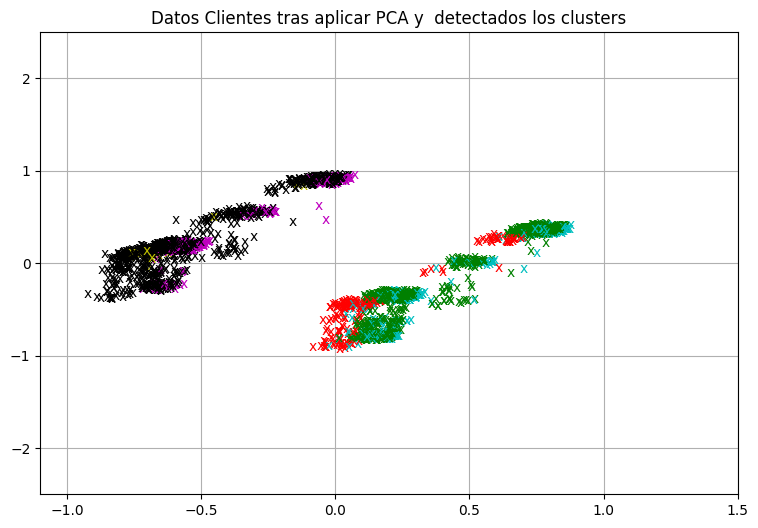

In [ ]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])
plt.xlim(-1.1, 1.5)
plt.ylim(-2.5, 2.5)
plt.grid()
plt.title("Datos Clientes tras aplicar PCA y  detectados los clusters")
plt.show()

## Calidad del clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy import cluster

# Normalización
scaler = preprocessing.MinMaxScaler()
clients_scaled = scaler.fit_transform(df_clients)

# Clustering jerárquico
linkage_matrix = cluster.hierarchy.linkage(clients_scaled, method='ward')
labels = cluster.hierarchy.fcluster(linkage_matrix, t=15, criterion='distance')

# Silhouette
silhouette = silhouette_score(clients_scaled, labels)
print(f"Puntuación de silueta: {silhouette:.2f}")


Puntuación de silueta: 0.32


## Análisis de los clústers obtenidos

In [ ]:
df_clients['Cluster'] = labels
print(df_clients.groupby('Cluster').mean())


               age       job   marital  education      balance   housing  \
Cluster                                                                    
1        45.031802  5.212014  1.190813   1.360424  1788.915194  0.000000   
2        39.470588  4.000000  1.151261   1.273109  1313.974790  0.924370   
3        45.798942  4.701058  1.097884   1.195767  1793.669312  0.000000   
4        42.169291  5.043307  1.213583   1.376969  1654.561024  0.000000   
5        43.910931  4.319838  1.056680   1.153846   934.287449  0.000000   
6        39.204489  4.039900  1.097257   1.117207   922.476309  0.950125   
7        39.860165  3.903643  1.101058   1.090482  1359.856639  1.000000   
8        39.436314  4.032520  1.192412   1.216802  1577.615176  1.000000   
9        39.018970  4.224932  1.154472   1.243902  1238.138211  1.000000   

             loan   contact    duration  campaign  poutcome    y  
Cluster                                                           
1        0.000000  0.236749  